In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Load the dataset
df = pd.read_csv("outputs/cleaned_olist_data.csv")
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

Revenue Trend Over Time

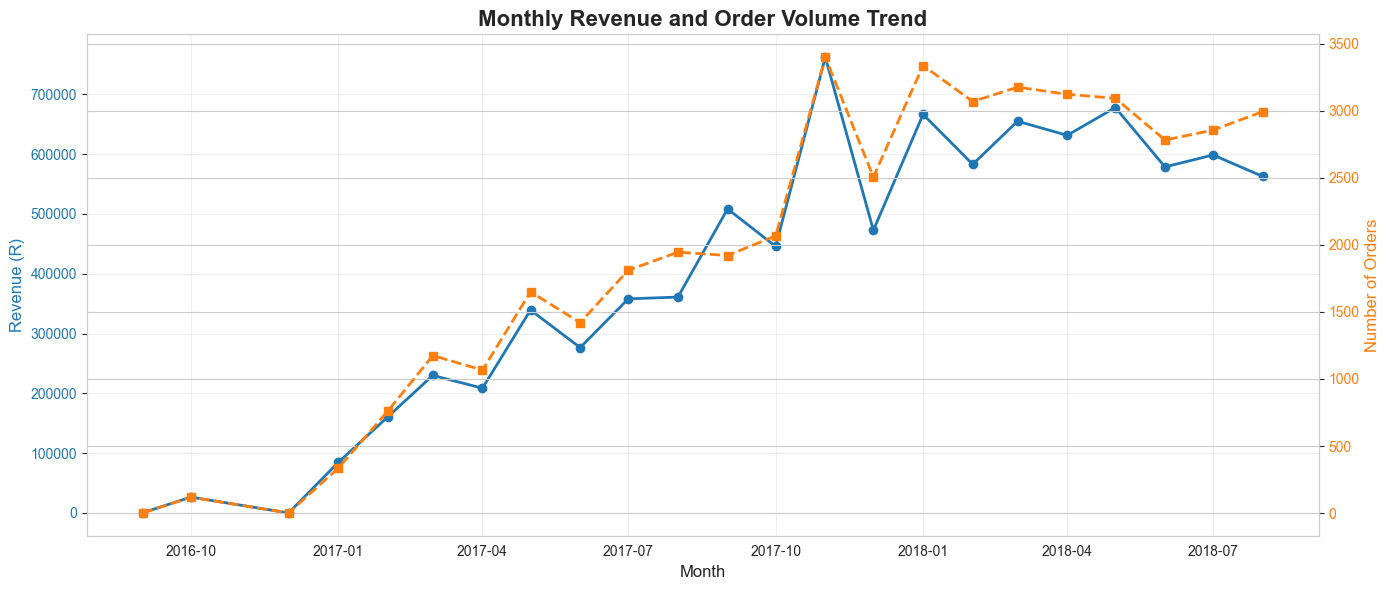

In [8]:
df.columns
monthly_revenue = df.groupby(df["order_purchase_timestamp"].dt.to_period("M")).agg({'payment_value': 'sum',"order_id":"nunique"}).reset_index()
monthly_revenue['order_purchase_timestamp'] = monthly_revenue['order_purchase_timestamp'].dt.to_timestamp()


fig , ax1 = plt.subplots(figsize=(14,6))
color = 'tab:blue'
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Revenue (R)', color=color, fontsize=12)
ax1.plot(monthly_revenue['order_purchase_timestamp'], 
         monthly_revenue['payment_value'], 
         color=color, linewidth=2, marker='o')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, alpha=0.3)

# Second y-axis for order count
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of Orders', color=color, fontsize=12)
ax2.plot(monthly_revenue['order_purchase_timestamp'], 
         monthly_revenue['order_id'], 
         color=color, linewidth=2, marker='s', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Monthly Revenue and Order Volume Trend', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/visualizations/01_revenue_trend.png', dpi=300, bbox_inches='tight')
plt.show()

Top 10 Categories by Revenue

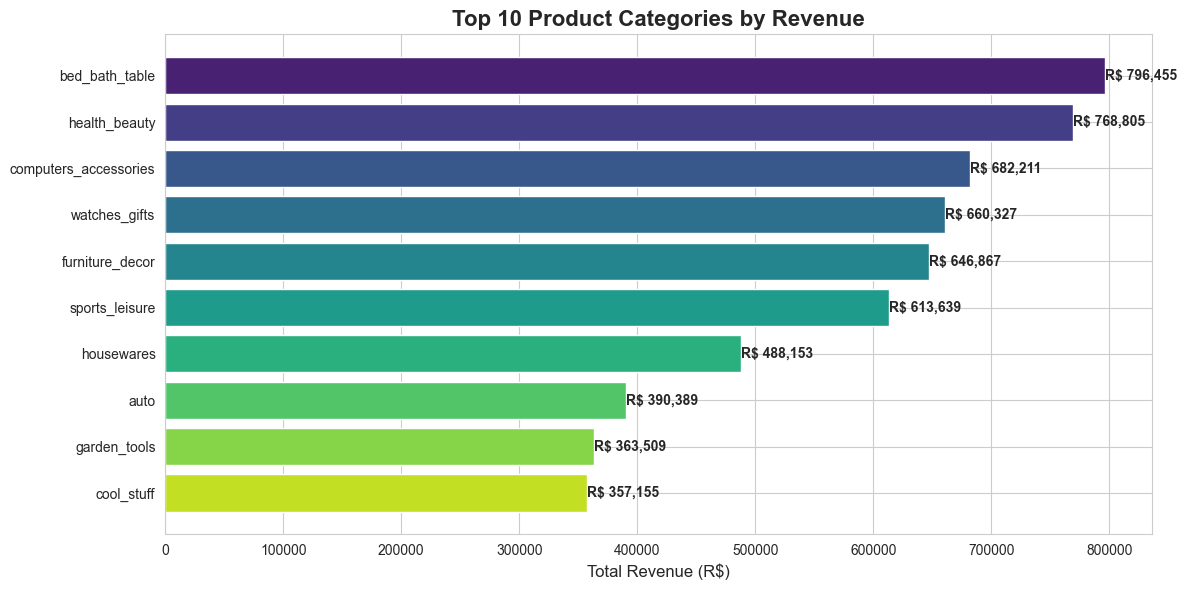

In [18]:
# Category analysis
category_analysis = df.groupby('product_category_name_english').agg({
    'payment_value': 'sum',
    'order_id': 'nunique',
    'review_score': 'mean'
}).round(2).sort_values('payment_value', ascending=False).head(10)

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(category_analysis.index, category_analysis['payment_value'], 
               color=sns.color_palette("viridis", 10))

# Add value labels
for i, bar in enumerate(bars):
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f'R$ {width:,.0f}', 
            ha='left', va='center', fontsize=10, fontweight='bold')

ax.set_xlabel('Total Revenue (R$)', fontsize=12)
ax.set_title('Top 10 Product Categories by Revenue', fontsize=16, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig('outputs/visualizations/02_top_categories.png', dpi=300, bbox_inches='tight')
plt.show()


 Delivery Performance Heatmap

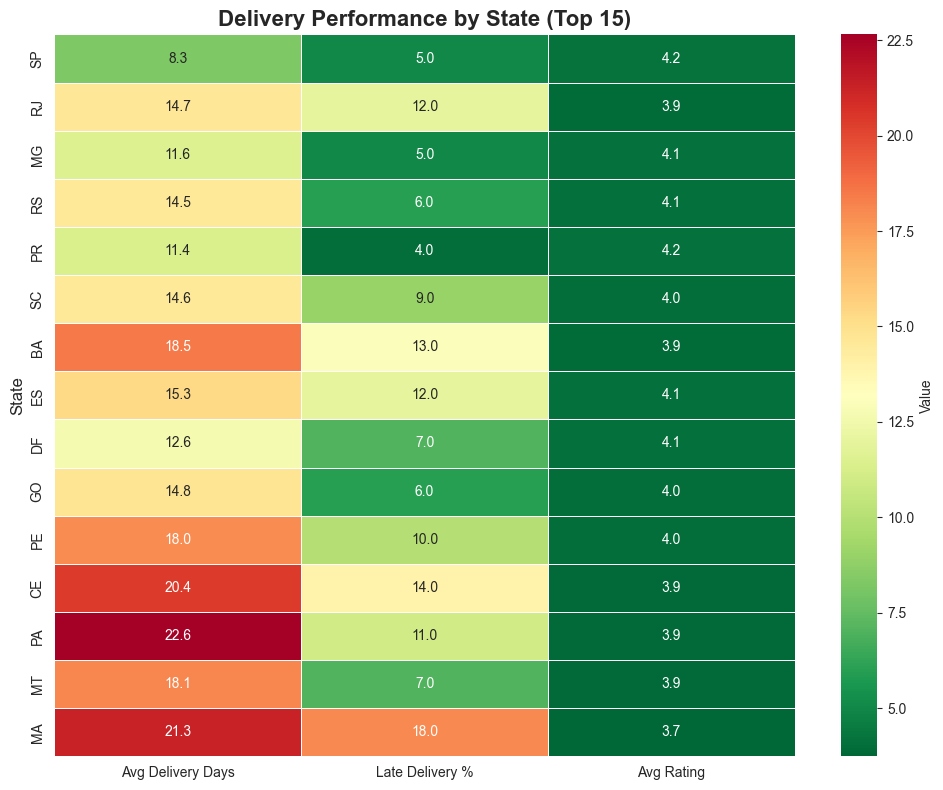

In [23]:
df.columns
delivery_by_state = df.groupby('customer_state').agg({
    "delivery_time": 'mean',
    "is_late": 'mean',
    'order_id': 'nunique',
    'review_score': 'mean'}).round(2)

delivery_by_state.columns = ['Avg Delivery Days', 'Late Delivery %', 'Order Count', 'Avg Rating']
delivery_by_state['Late Delivery %'] = delivery_by_state['Late Delivery %'] * 100

top_states = delivery_by_state.nlargest(15, 'Order Count')

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(top_states[['Avg Delivery Days', 'Late Delivery %', 'Avg Rating']], 
            annot=True, fmt='.1f', cmap='RdYlGn_r', 
            linewidths=0.5, cbar_kws={'label': 'Value'})
plt.title('Delivery Performance by State (Top 15)', fontsize=16, fontweight='bold')
plt.ylabel('State', fontsize=12)
plt.tight_layout()
plt.savefig('outputs/visualizations/03_delivery_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()


Customer Review Distribution

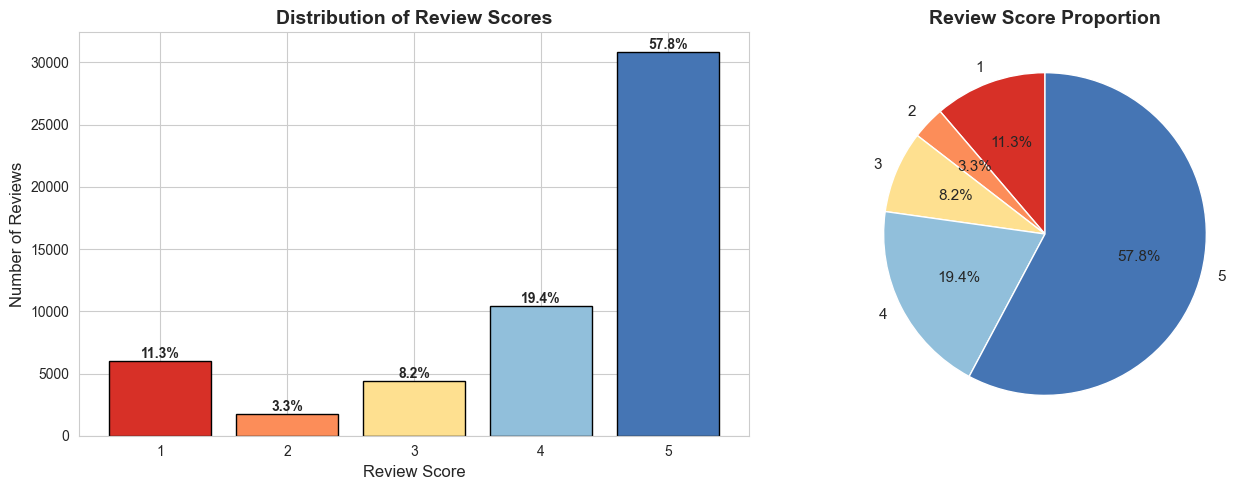

In [28]:
# Review distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
review_dist = df['review_score'].value_counts().sort_index()
colors = ['#d73027', '#fc8d59', '#fee090', '#91bfdb', '#4575b4']
ax1.bar(review_dist.index, review_dist.values, color=colors, edgecolor='black')
ax1.set_xlabel('Review Score', fontsize=12)
ax1.set_ylabel('Number of Reviews', fontsize=12)
ax1.set_title('Distribution of Review Scores', fontsize=14, fontweight='bold')
ax1.set_xticks([1, 2, 3, 4, 5])

# Add percentage labels
total_reviews = review_dist.sum()
for i, v in enumerate(review_dist.values):
    pct = (v / total_reviews) * 100
    ax1.text(review_dist.index[i], v, f'{pct:.1f}%', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Pie chart
ax2.pie(review_dist.values, labels=review_dist.index, autopct='%1.1f%%',
        colors=colors, startangle=90, textprops={'fontsize': 11})
ax2.set_title('Review Score Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/visualizations/04_review_distribution.png', dpi=300, bbox_inches='tight')
plt.show()



 Correlation Heatmap

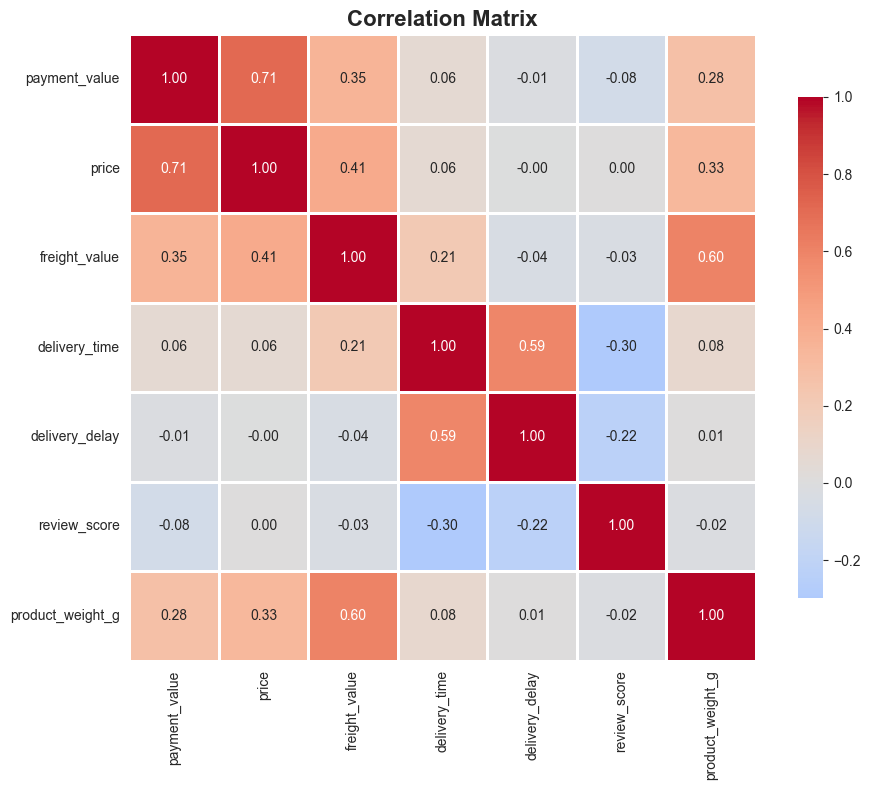

In [30]:
cor_col =['payment_value',
    'price',
    'freight_value',
    'delivery_time',
    'delivery_delay',
    'review_score',
    'product_weight_g']
cor_data = df[cor_col].corr()

fig , ax = plt.subplots(figsize=(10, 8))
sns.heatmap(cor_data,annot=True,fmt=".2f",cmap="coolwarm",center=0,square=True,linewidths=1,cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('outputs/visualizations/05_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
category_profit = df.groupby('product_category_name_english').agg({
    'price': 'sum',
    'freight_value': 'sum'
})
category_profit['profit_margin'] = category_profit['price'] - category_profit['freight_value']
category_profit = category_profit.sort_values('profit_margin', ascending=False).head(10)
category_profit


,price,freight_value,profit_margin
product_category_name_english,,,
watches_gifts,570904.32,48664.23,522240.09
health_beauty,603260.05,87456.32,515803.73
bed_bath_table,507375.39,99178.53,408196.86
sports_leisure,456134.28,78749.58,377384.70
computers_accessories,419393.36,67605.66,351787.70
furniture_decor,346541.23,81048.77,265492.46
cool_stuff,301811.44,39633.09,262178.35
auto,297138.32,44906.81,252231.51
housewares,307565.82,69973.50,237592.32


C:\Users\Hp\AppData\Local\Temp\ipykernel_24356\3187700709.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rateing_by_delivery_time =df.groupby("delivery_time").agg({


<Axes: xlabel='delivery_time', ylabel='review_score'>

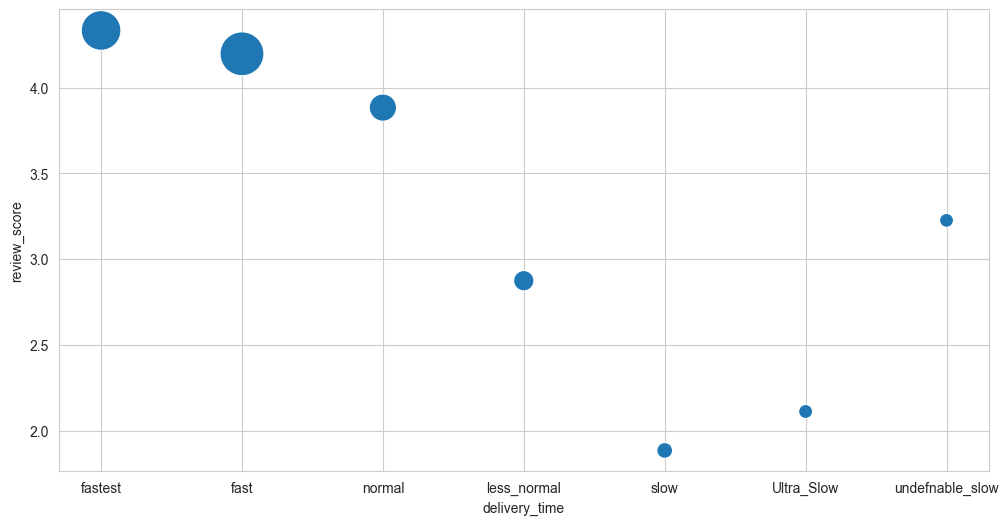

In [22]:
df["delivery_time"] = pd.cut(df["delivery_time"], bins=[0,7,16,25,40,70,120,np.inf], labels=["fastest","fast","normal","less_normal","slow","Ultra_Slow","undefnable_slow"])
rateing_by_delivery_time =df.groupby("delivery_time").agg({
    "order_id":"nunique",
    "review_score":"mean"
})
sns.scatterplot(data=rateing_by_delivery_time, x=rateing_by_delivery_time.index, y="review_score", size="order_id", legend=False, sizes=(100, 1000))

Overall Delivery Metrics

In [12]:
# Average delivery time

avg_delivery_time = df["delivery_time"].mean()
# Median delivery time
median_delivery_time = df["delivery_time"].median()
# % of late deliveries
# % of very late deliveries 
late_threshold = 12
very_late_threshold = 20
# Calculate the count of late deliveries (True values sum as 1)
late_count = (df['delivery_time'] > late_threshold).sum()
very_late_count = (df['delivery_time'] > very_late_threshold).sum()

# Calculate the total number of deliveries
total_count = len(df)

# Calculate the percentage of late deliveries
percentage_late = (late_count / total_count) * 100
percentage_very_late = (very_late_count/total_count) * 100
print(f"Average Delivery Time: {avg_delivery_time:.2f} days")
print(f"Median Delivery Time: {median_delivery_time:.2f} days")
print(f"Percentage of Late Deliveries (> {late_threshold} days): {percentage_late:.2f}%")
print(f"Percentage of Very Late Deliveries (> {very_late_threshold} days): {percentage_very_late:.2f}%")


Average Delivery Time: 12.02 days
Median Delivery Time: 10.00 days
Percentage of Late Deliveries (> 12 days): 35.52%
Percentage of Very Late Deliveries (> 20 days): 12.87%


DELIVERY TiME DISTRIBUTION

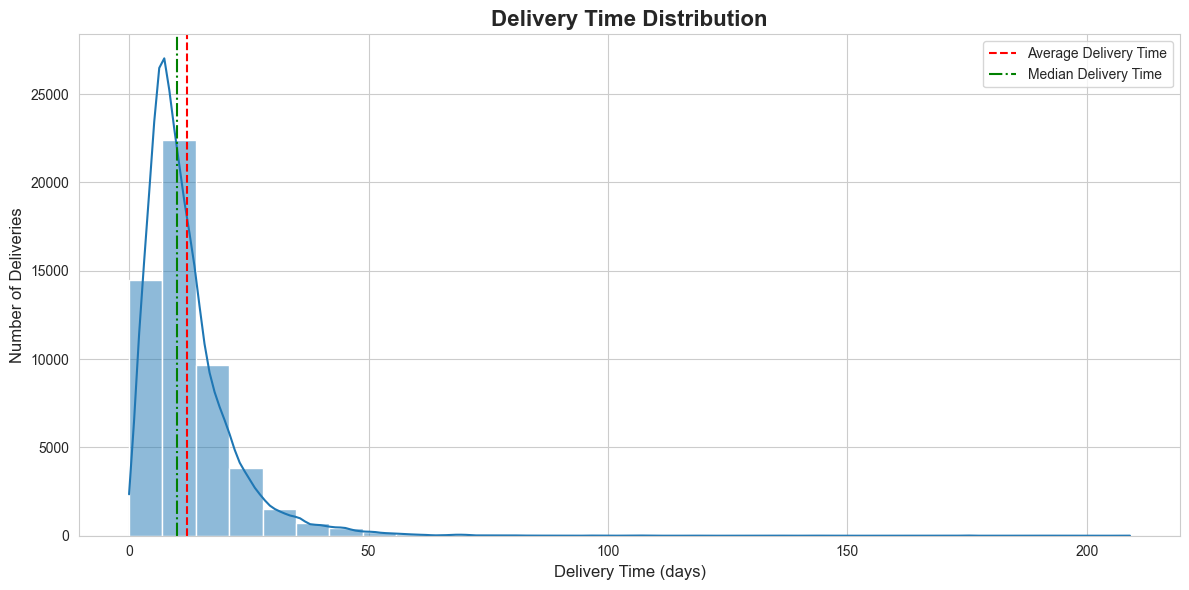

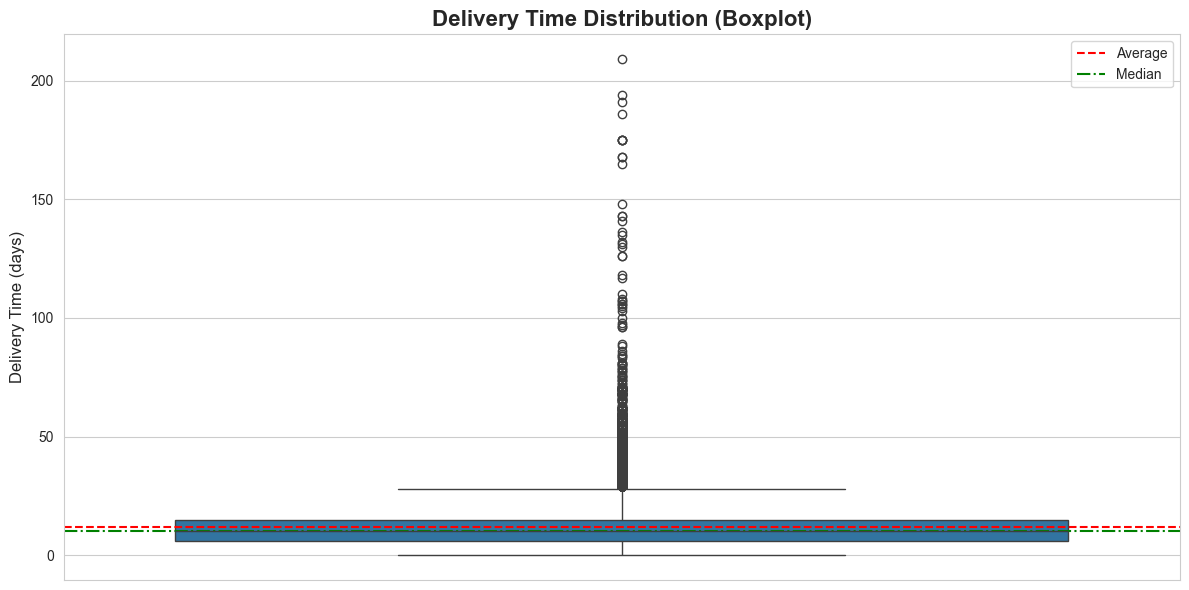

In [13]:
# histogram of delivery times

sns.histplot(data=df, x="delivery_time", bins=30, kde=True)
plt.axvline(avg_delivery_time, color='r', linestyle='--', label='Average Delivery Time')
plt.axvline(median_delivery_time, color='g', linestyle='-.', label='Median Delivery Time')
plt.title('Delivery Time Distribution', fontsize=16, fontweight='bold')         
plt.xlabel('Delivery Time (days)', fontsize=12)
plt.ylabel('Number of Deliveries', fontsize=12)
plt.legend()
plt.tight_layout()
# plt.savefig('outputs/visualizations/06_delivery_time_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify if there are outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, y="delivery_time", ax=ax)
ax.axhline(avg_delivery_time, color='r', linestyle='--', label='Average')
ax.axhline(median_delivery_time, color='g', linestyle='-.', label='Median')
ax.set_title('Delivery Time Distribution (Boxplot)', fontsize=16, fontweight='bold')
ax.set_ylabel('Delivery Time (days)', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

Late Delivery Analysis

Late Deliveries: 7.24%
Very Late Deliveries (>7 days delay): 3.11%


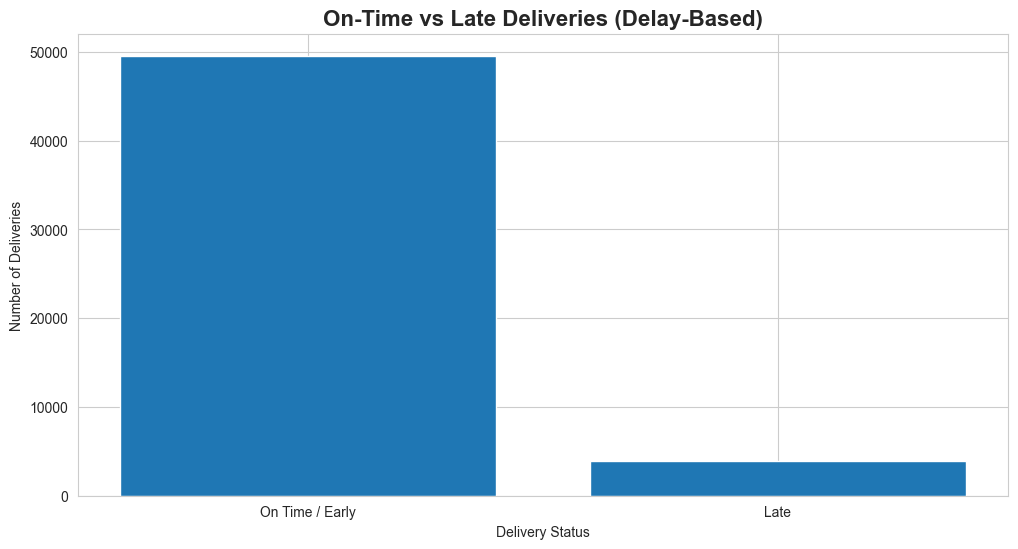

Average delay for late deliveries (days): 10.005427759110882


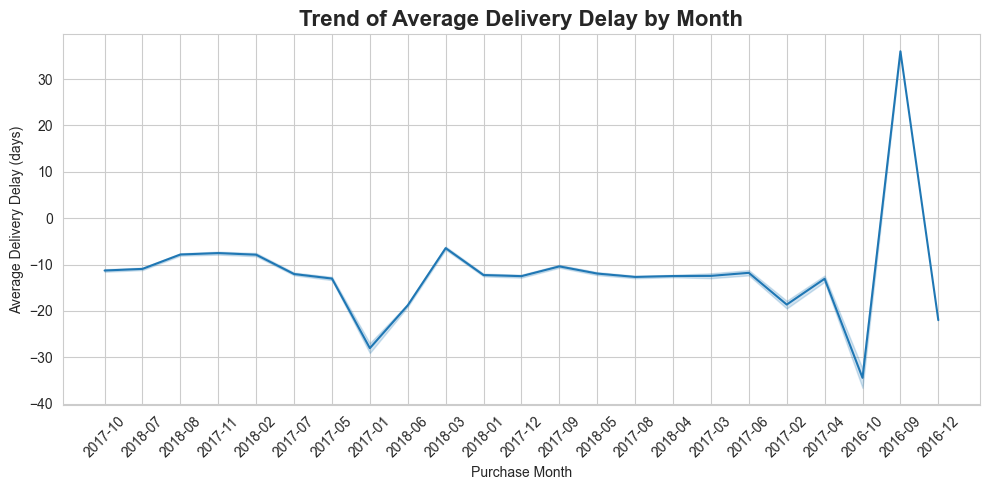

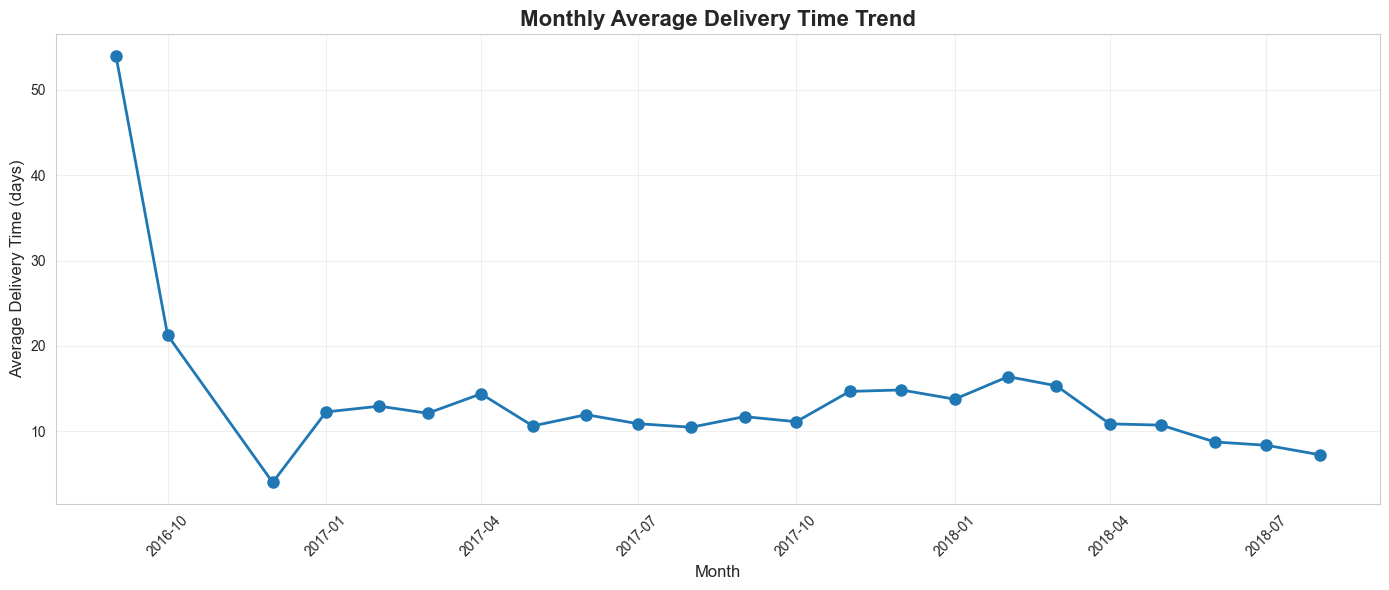

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df["order_estimated_delivery_date"] = pd.to_datetime(df["order_estimated_delivery_date"])
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])


# Delivery time calculations


# Expected delivery duration
df["expected_delivery_days"] = (
    df["order_estimated_delivery_date"] -
    df["order_purchase_timestamp"]
).dt.days

# Actual delivery duration
df["actual_delivery_days"] = (
    df["order_delivered_customer_date"] -
    df["order_purchase_timestamp"]
).dt.days

# Delivery delay (positive = late, negative = early)
df["delivery_delay"] = (
    df["actual_delivery_days"] - df["expected_delivery_days"]
)

# Delay-based delivery status


# Late deliveries
df["is_late"] = (df["delivery_delay"] > 0).astype(int)

# Very late deliveries (>7 days late)
df["is_very_late"] = (df["delivery_delay"] > 7).astype(int)


# Percentages


late_percentage = df["is_late"].mean() * 100
very_late_percentage = df["is_very_late"].mean() * 100

print(f"Late Deliveries: {late_percentage:.2f}%")
print(f"Very Late Deliveries (>7 days delay): {very_late_percentage:.2f}%")


# On-time vs Late comparison 


on_time_count = (df["delivery_delay"] <= 0).sum()
late_count = (df["delivery_delay"] > 0).sum()

plt.bar(
    ["On Time / Early", "Late"],
    [on_time_count, late_count]
)
plt.title("On-Time vs Late Deliveries (Delay-Based)", fontsize=16, fontweight="bold")
plt.xlabel("Delivery Status")
plt.ylabel("Number of Deliveries")

plt.show()


# Average delay for late deliveries


print(
    "Average delay for late deliveries (days):",
    df.loc[df["delivery_delay"] > 0, "delivery_delay"].mean()
)


# Trend: Average delivery delay over time


df["purchase_month"] = df["order_purchase_timestamp"].dt.to_period("M").astype(str)

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df,
    x="purchase_month",
    y="delivery_delay",
    estimator="mean"
)
plt.title("Trend of Average Delivery Delay by Month", fontsize=16, fontweight="bold")
plt.xlabel("Purchase Month")
plt.ylabel("Average Delivery Delay (days)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


monthly_delivery = df.groupby(
    df['order_purchase_timestamp'].dt.to_period('M')
).agg({
    'delivery_time': 'mean',
    'is_late': 'mean'
}).reset_index()

monthly_delivery['order_purchase_timestamp'] = monthly_delivery['order_purchase_timestamp'].dt.to_timestamp()

# Now plot
plt.figure(figsize=(14, 6))
plt.plot(monthly_delivery['order_purchase_timestamp'], 
         monthly_delivery['delivery_time'], 
         marker='o', linewidth=2, markersize=8)
plt.title('Monthly Average Delivery Time Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Delivery Time (days)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


GEOGRAPHICAL ANALYSIS

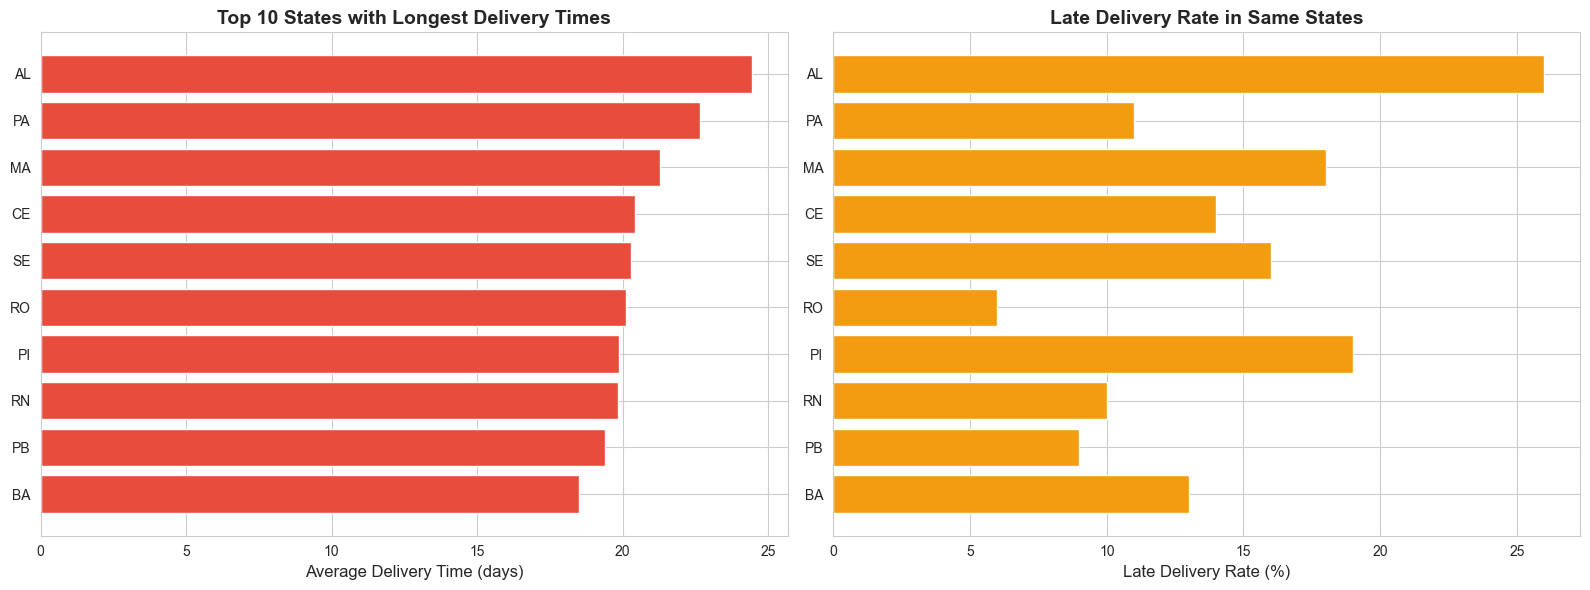


Worst Performing States:
                Avg Delivery Days  Avg Delay Days  Late %  Order Count
customer_state                                                        
AL                          24.44           -7.52    26.0          195
PA                          22.65          -14.70    11.0          515
MA                          21.28          -10.01    18.0          389
CE                          20.43          -11.01    14.0          719
SE                          20.28          -10.37    16.0          191
RO                          20.11          -18.85     6.0          125
PI                          19.88           -9.62    19.0          236
RN                          19.83          -13.73    10.0          259
PB                          19.39          -13.29     9.0          301
BA                          18.50          -10.53    13.0         1823


In [17]:


state_performance = df.groupby('customer_state').agg({
    'delivery_time': 'mean',
    'delivery_delay': 'mean',
    'is_late': 'mean',
    'order_id': 'count'
}).round(2)

# Rename columns
state_performance.columns = ['Avg Delivery Days', 'Avg Delay Days', 'Late %', 'Order Count']
state_performance['Late %'] = state_performance['Late %'] * 100

# Filter to states with significant volume
state_performance = state_performance[state_performance['Order Count'] >= 100]

# Get worst 10 by delivery time
worst_states = state_performance.nlargest(10, 'Avg Delivery Days')

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Worst states by delivery time
axes[0].barh(worst_states.index, worst_states['Avg Delivery Days'], color='#e74c3c')
axes[0].set_xlabel('Average Delivery Time (days)', fontsize=12)
axes[0].set_title('Top 10 States with Longest Delivery Times', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()

# Chart 2: Late delivery rate
axes[1].barh(worst_states.index, worst_states['Late %'], color='#f39c12')
axes[1].set_xlabel('Late Delivery Rate (%)', fontsize=12)
axes[1].set_title('Late Delivery Rate in Same States', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nWorst Performing States:")
print(worst_states)

Impact on Customer Satisfaction


Review Score Comparison:
        review_score       
                mean  count
is_late                    
0               4.22  49564
1               2.48   3869


C:\Users\Hp\AppData\Local\Temp\ipykernel_10780\3708329378.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(['On-Time', 'Late'])


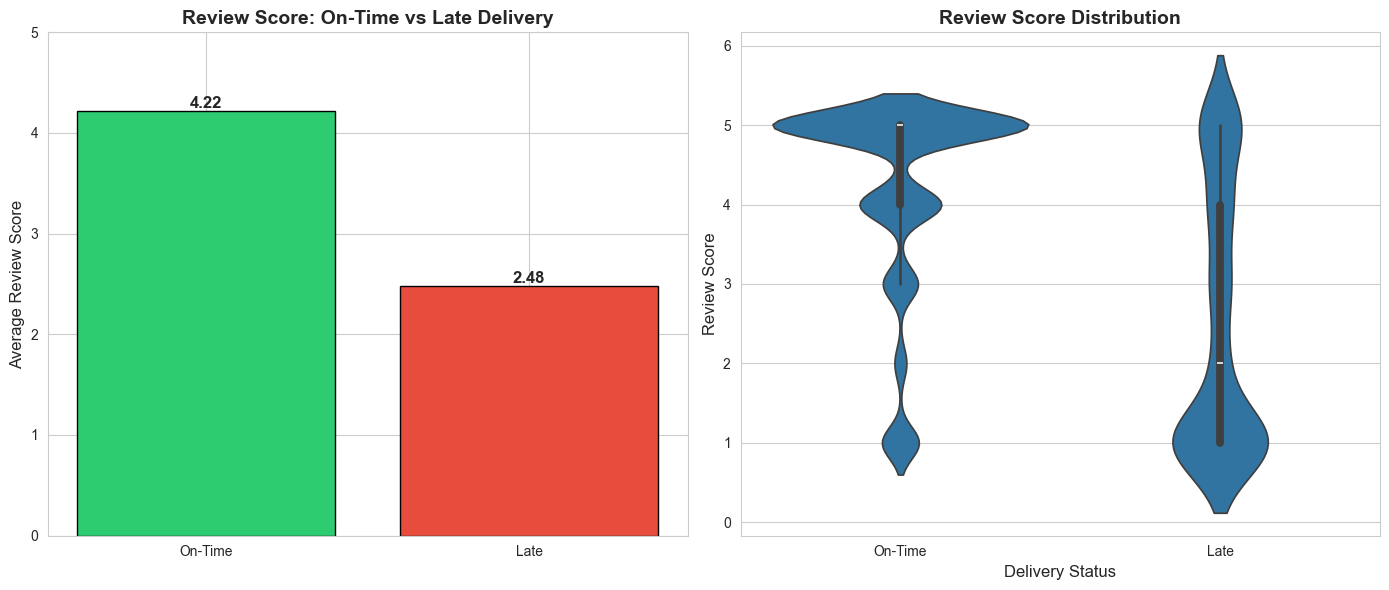

In [19]:

# Compare review scores: On-time vs Late
comparison = df.groupby('is_late').agg({
    'review_score': ['mean', 'count']
}).round(2)

print("\nReview Score Comparison:")
print(comparison)

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Chart 1: Bar comparison
review_comparison = df.groupby('is_late')['review_score'].mean()
colors = ['#2ecc71', '#e74c3c']
axes[0].bar(['On-Time', 'Late'], review_comparison.values, color=colors, edgecolor='black')
axes[0].set_ylabel('Average Review Score', fontsize=12)
axes[0].set_title('Review Score: On-Time vs Late Delivery', fontsize=14, fontweight='bold')
axes[0].set_ylim([0, 5])

# Add value labels
for i, v in enumerate(review_comparison.values):
    axes[0].text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Chart 2: Distribution comparison
df_sample = df.sample(min(10000, len(df)))  # Sample for performance
sns.violinplot(data=df_sample, x='is_late', y='review_score', ax=axes[1])
axes[1].set_xticklabels(['On-Time', 'Late'])
axes[1].set_xlabel('Delivery Status', fontsize=12)
axes[1].set_ylabel('Review Score', fontsize=12)
axes[1].set_title('Review Score Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

Seasonal/Temporal Patterns

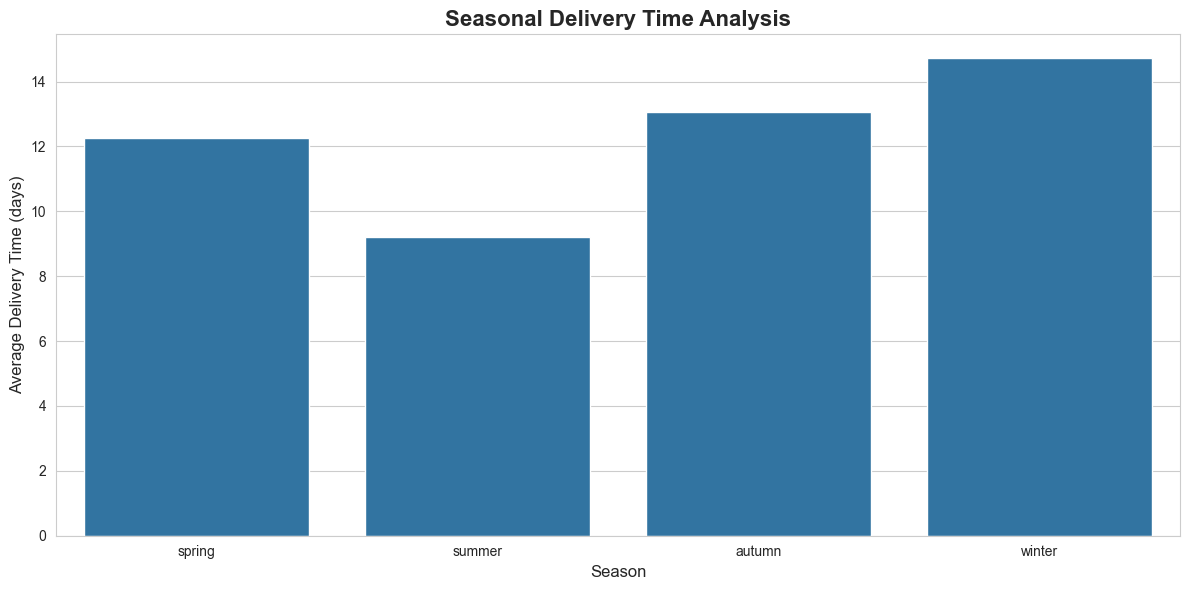

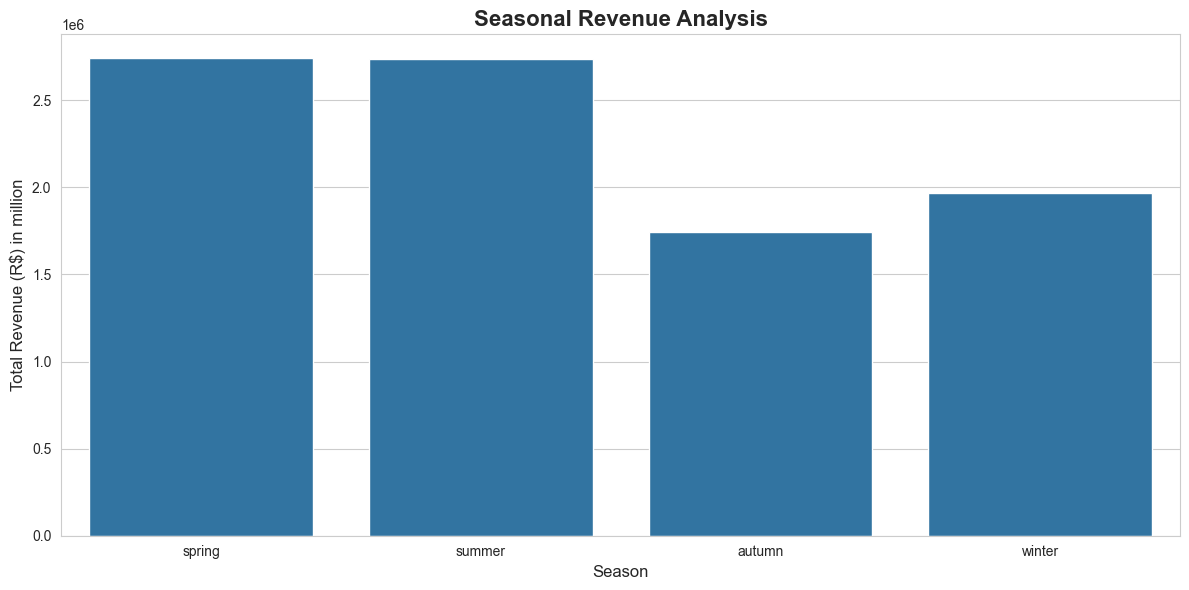

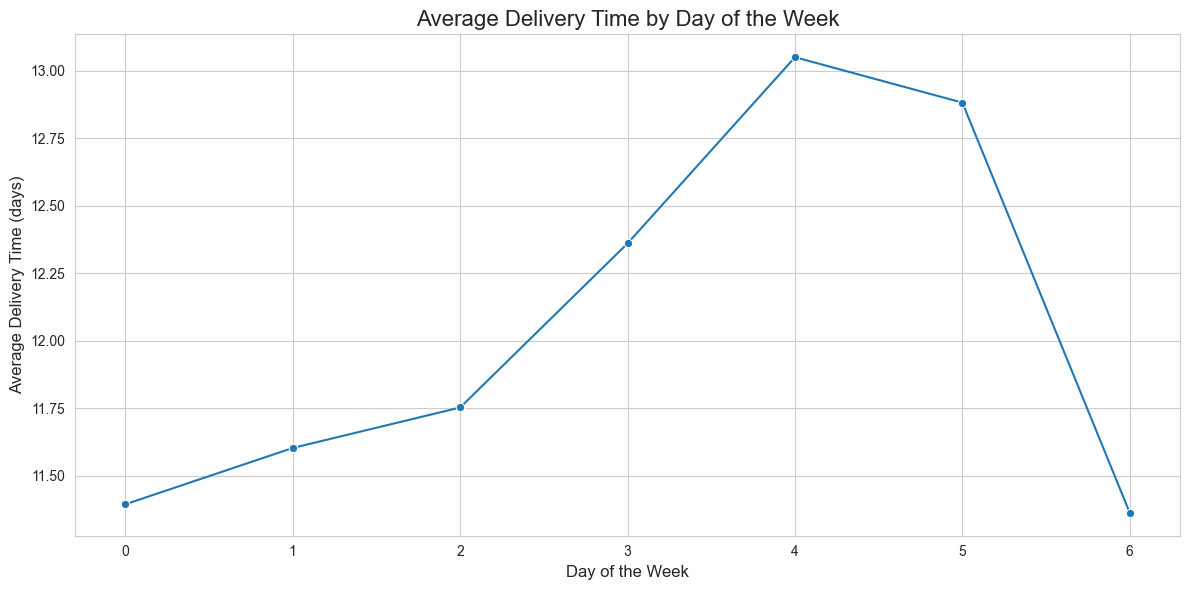

In [56]:
season_map = {
    12: 'winter', 1: 'winter', 2: 'winter',
    3: 'spring', 4: 'spring', 5: 'spring',
    6: 'summer', 7: 'summer', 8: 'summer',
    9: 'autumn', 10: 'autumn', 11: 'autumn'
}

df["season"] = df["order_purchase_timestamp"].dt.month.map(season_map)
seasonal_analyse = df.groupby("season").agg({
    "order_id":"nunique",
    "payment_value":"sum",
    "review_score":"mean",
    "delivery_time":"mean"
}).round(2)


# Do delivery times vary by season
sns.barplot(data=seasonal_analyse.reset_index(), x="season", y="delivery_time", order=["spring","summer","autumn","winter"])
plt.title('Seasonal Delivery Time Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Delivery Time (days)', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/12_seasonal_delivery_time_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



# do revenue vary by season
sns.barplot(data=seasonal_analyse.reset_index(), x="season", y="payment_value", order=["spring","summer","autumn","winter"])
plt.title('Seasonal Revenue Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Revenue (R$) in million', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/12_seasonal_revenue_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

#  Do orders placed on Monday deliver faster than Friday?
monthly_changes = df.groupby("day_of_week").agg({
    "payment_value":"sum",
    "order_id":"nunique",
    "review_score":"mean",
    "delivery_time":"mean"
})

# Are there specific months with worse performance?
# Day of week analysis: Do orders placed on Monday deliver faster than Friday?
sns.lineplot(data=monthly_changes.reset_index(), x="day_of_week", y="delivery_time", marker='o')
plt.title('Average Delivery Time by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Delivery Time (days)', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/13_delivery_time_by_day_of_week.png', dpi=300, bbox_inches='tight')
plt.show()




Freight Cost Analysis

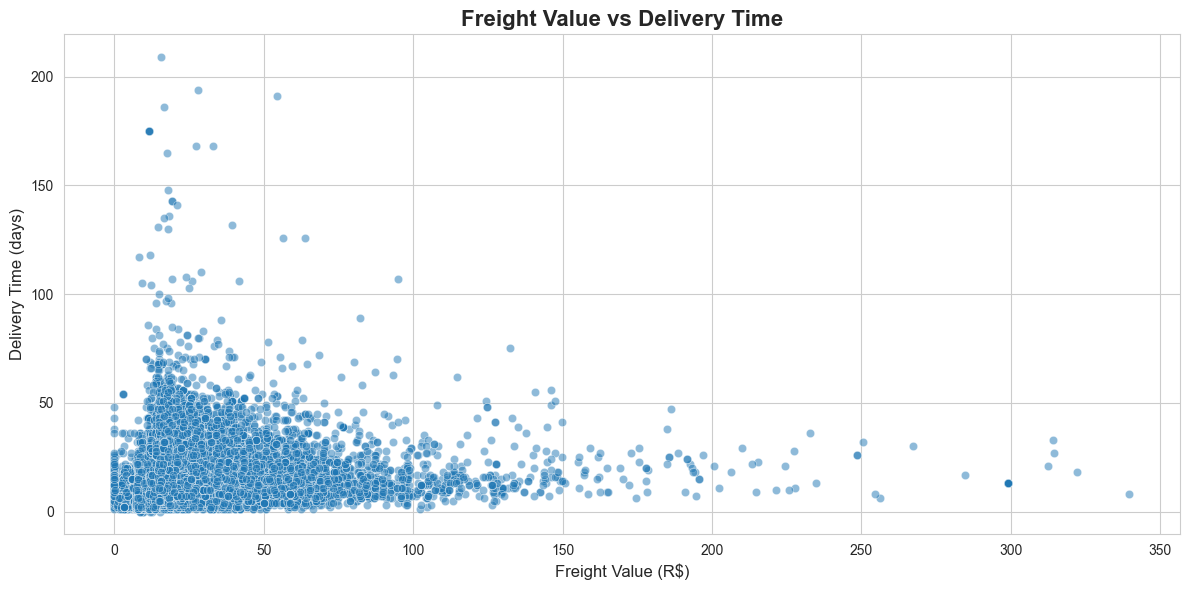

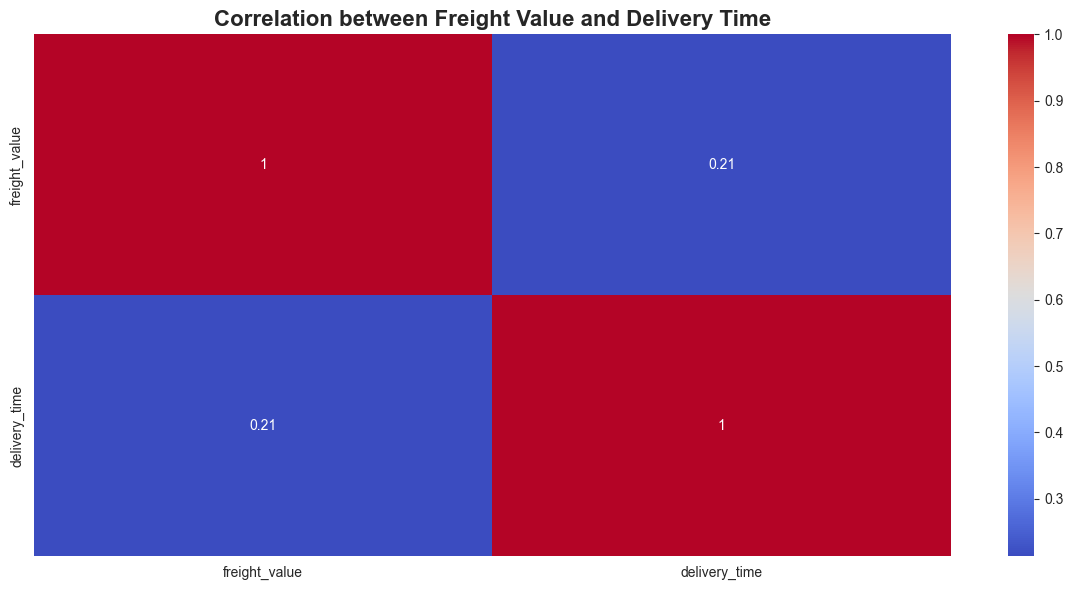


Correlation between freight cost and delivery time: 0.2136
→ Freight cost has little relationship with delivery time
→ Delivery time is driven by other factors (distance, logistics)


In [20]:
# Do customers paying higher freight get faster delivery

df.groupby('freight_value').agg({
    'delivery_time': 'mean',
    'is_late': 'mean',
    'order_id': 'nunique',
    "payment_value": 'mean'
})
sns.scatterplot(data=df, x="freight_value", y="delivery_time", alpha=0.5)
plt.title('Freight Value vs Delivery Time', fontsize=16, fontweight='bold')
plt.xlabel('Freight Value (R$)', fontsize=12)
plt.ylabel('Delivery Time (days)', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/14_freight_value_vs_delivery_time.png', dpi=300, bbox_inches='tight')
plt.show()

# Is there a relationship between freight cost and delivery performance
sns.heatmap(df[["freight_value","delivery_time"]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Freight Value and Delivery Time', fontsize=16, fontweight='bold')
plt.tight_layout()
# plt.savefig('outputs/visualizations/15_freight_value_delivery_time_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate correlation
freight_correlation = df[['freight_value', 'delivery_time']].corr().iloc[0, 1]

print(f"\nCorrelation between freight cost and delivery time: {freight_correlation:.4f}")

if freight_correlation > 0.3:
    print("→ Higher freight costs are associated with LONGER delivery times")
    print("→ This suggests heavier/bulkier items take longer to deliver")
elif freight_correlation < -0.3:
    print("→ Higher freight costs are associated with SHORTER delivery times")
    print("→ This suggests express shipping for premium freight")
else:
    print("→ Freight cost has little relationship with delivery time")
    print("→ Delivery time is driven by other factors (distance, logistics)")


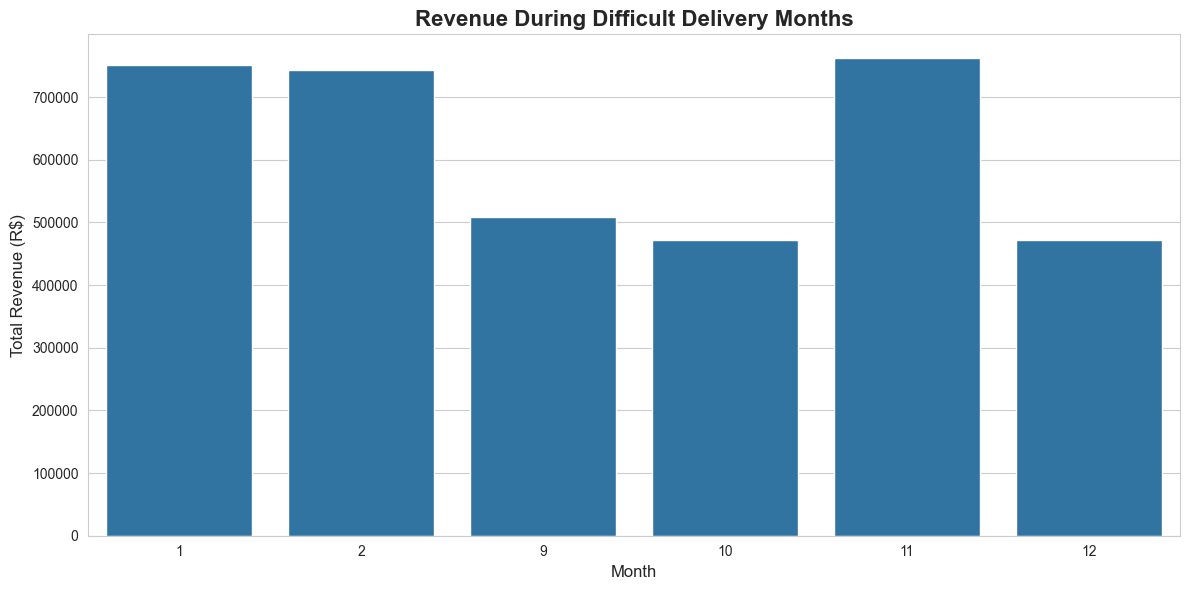

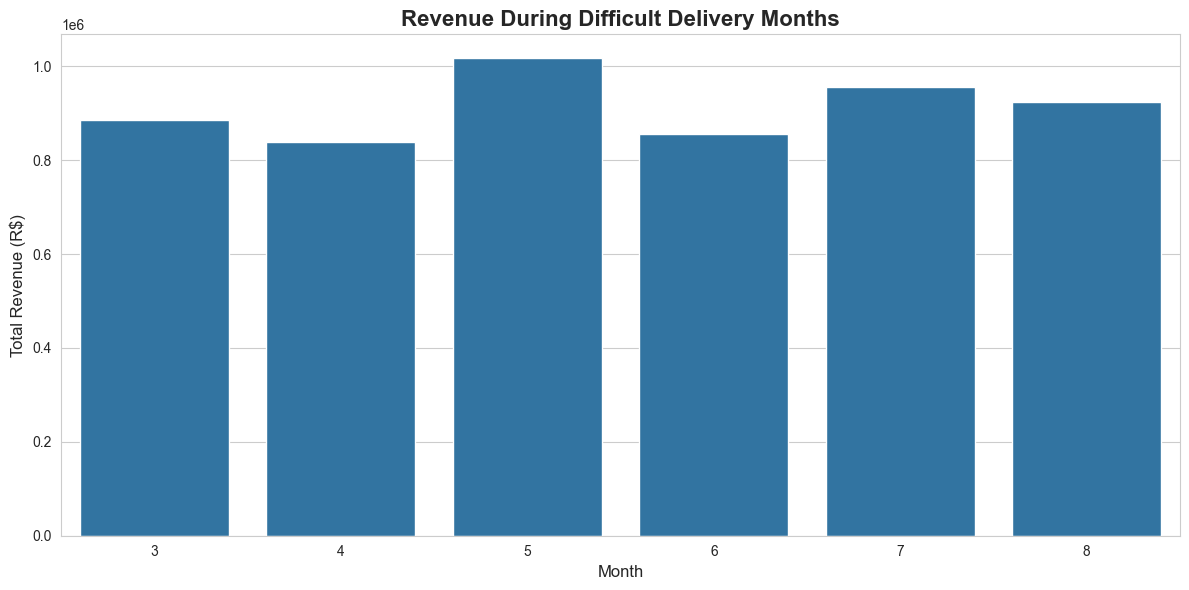

In [91]:
# Filtering for months 9, 10, 11, 12, 1, 2
months_list = [9, 10, 11, 12, 1, 2]
more_time_Delivery_period = df[df["order_purchase_timestamp"].dt.month.isin(months_list)]
difficult_revenue = more_time_Delivery_period.groupby(more_time_Delivery_period["order_purchase_timestamp"].dt.month)["payment_value"].sum()
sns.barplot(x=difficult_revenue.index, y=difficult_revenue.values)
plt.title('Revenue During Difficult Delivery Months', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (R$)', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/16_difficult_delivery_months_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

months_list = [3,4,5,6,7,8]
more_time_Delivery_period = df[df["order_purchase_timestamp"].dt.month.isin(months_list)]
difficult_revenue = more_time_Delivery_period.groupby(more_time_Delivery_period["order_purchase_timestamp"].dt.month)["payment_value"].sum()
sns.barplot(x=difficult_revenue.index, y=difficult_revenue.values)
plt.title('Revenue During Difficult Delivery Months', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue (R$)', fontsize=12)
plt.tight_layout()
# plt.savefig('outputs/visualizations/16_difficult_delivery_months_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

